<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Classification-model-in-cnn-2022__final-/blob/main/My_model_Test(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

import os
import seaborn as sns

In [2]:
print(os.listdir("/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/"))

['Validation', '.ipynb_checkpoints', 'Training', 'valid_test_data', 'Validation_Fish', 'Training1 ', 'Training New', 'Validation New']


In [3]:
SIZE = 128

In [4]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    #for img_path in glob.glob(os.path.join(directory_path)):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
       # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Spotted_Snakehead_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Hilsha_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Barbel_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Tilapia_Fish


In [5]:
train_images.shape

(4800, 128, 128, 3)

In [6]:
train_labels.shape

(4800,)

In [7]:
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/*"):
    fruit_label = directory_path.split("\\")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Tilapia_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Spotted_Snakehead_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Barbel_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Hilsha_Fish


In [8]:
test_images.shape

(1200, 128, 128, 3)

In [9]:
test_labels.shape

(1200,)

In [10]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [11]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [12]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
x_train.shape

(4800, 128, 128, 3)

In [14]:
x_test.shape

(1200, 128, 128, 3)

In [15]:
y_train.shape

(4800,)

In [16]:
y_test.shape

(1200,)

In [17]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [18]:
y_train_one_hot.shape

(4800, 4)

In [19]:
y_test_one_hot.shape

(1200, 4)

In [43]:

activation = 'softmax'

feature_extractor = Sequential()


feature_extractor.add(Conv2D(16,padding='same', strides=(1, 1),dilation_rate=(1, 1),kernel_size=(3,3),
                             activation = 'relu',input_shape = (128,128,3)))
feature_extractor.add(MaxPooling2D(2,2))


feature_extractor.add(Conv2D(32,padding='same', strides=(1, 1),dilation_rate=(1, 1),kernel_size=(3,3),
                             kernel_initializer = 'he_uniform',activation = 'relu'))
feature_extractor.add(MaxPooling2D(2,2))


feature_extractor.add(Conv2D(64,padding='same', strides=(1, 1),dilation_rate=(1, 1),kernel_size=(3,3),
                             kernel_initializer = 'he_uniform',activation = 'relu'))
feature_extractor.add(MaxPooling2D(2,2))

feature_extractor.add(Conv2D(128,padding='same', strides=(1, 1),dilation_rate=(1, 1),kernel_size=(3,3),
                             kernel_initializer = 'he_uniform',activation = 'relu'))
feature_extractor.add(MaxPooling2D(2,2))

feature_extractor.add(Conv2D(256,padding='same', strides=(1, 1),dilation_rate=(1, 1),kernel_size=(3,3),
                             kernel_initializer = 'he_uniform',activation = 'relu'))
feature_extractor.add(MaxPooling2D(2,2))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(2,2))

feature_extractor.add(Flatten())

In [44]:

#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(512, activation = 'relu', kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)

In [45]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)

In [46]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(loss = 'categorical_crossentropy',
              #optimizer = 'Adam',
              optimizer = opt,
              metrics = ['accuracy'])


In [47]:
print(cnn_model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10_input (InputLayer  [(None, 128, 128, 3)]    0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                           

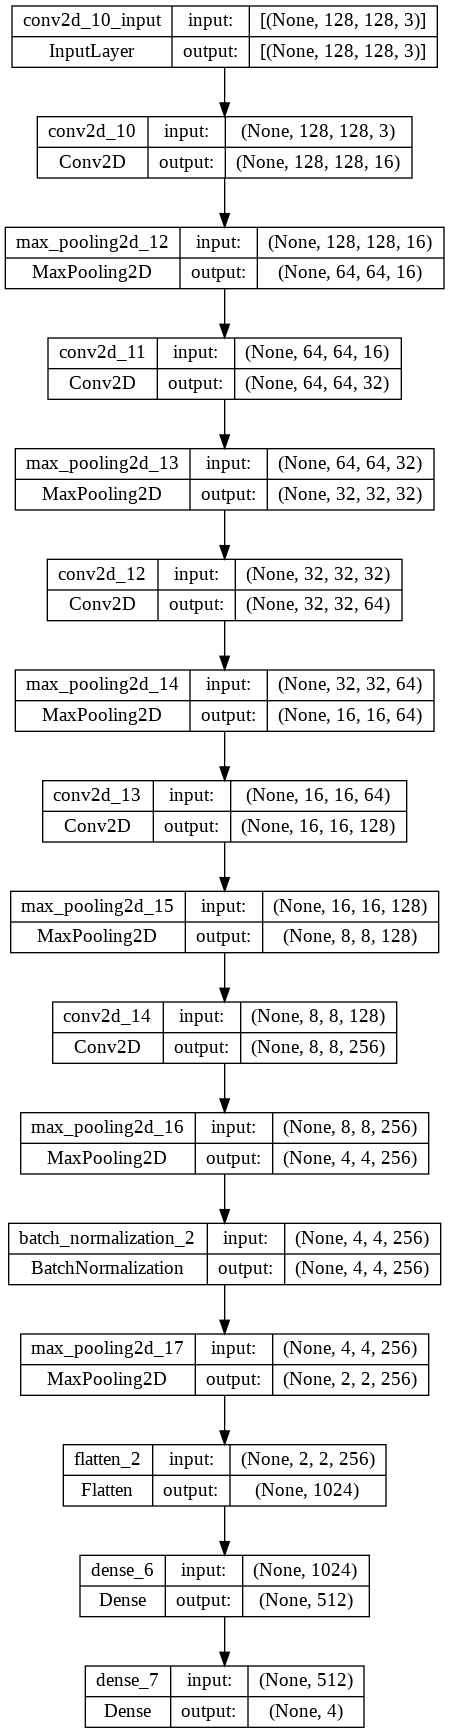

In [48]:
from tensorflow.keras.utils import plot_model
plot_model(model = cnn_model,show_shapes = True)

In [49]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [50]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part thirteen/my_model_test(4).hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,factor = 0.1)

In [51]:
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=5,shuffle = True,callbacks = [erl_stop,mod_chk,lr_rate],
                           verbose = 2, validation_data = (x_test, y_test_one_hot))

Epoch 1/5
150/150 - 100s - loss: 0.6353 - accuracy: 0.7794 - val_loss: 1.1641 - val_accuracy: 0.4200 - lr: 1.0000e-04 - 100s/epoch - 667ms/step
Epoch 2/5
150/150 - 101s - loss: 0.3230 - accuracy: 0.8952 - val_loss: 0.8344 - val_accuracy: 0.6392 - lr: 1.0000e-04 - 101s/epoch - 675ms/step
Epoch 3/5
150/150 - 99s - loss: 0.2103 - accuracy: 0.9333 - val_loss: 0.3800 - val_accuracy: 0.8725 - lr: 1.0000e-04 - 99s/epoch - 661ms/step
Epoch 4/5
150/150 - 99s - loss: 0.1473 - accuracy: 0.9540 - val_loss: 0.2170 - val_accuracy: 0.9375 - lr: 1.0000e-04 - 99s/epoch - 661ms/step
Epoch 5/5
150/150 - 101s - loss: 0.0946 - accuracy: 0.9777 - val_loss: 0.1688 - val_accuracy: 0.9417 - lr: 1.0000e-04 - 101s/epoch - 676ms/step


In [63]:
acc = cnn_model.evaluate(test_images,steps = len(test_images),verbose = 2)
print('%.2f'%(acc[1]*100))

1200/1200 - 1s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - 1s/epoch - 1ms/step
0.00


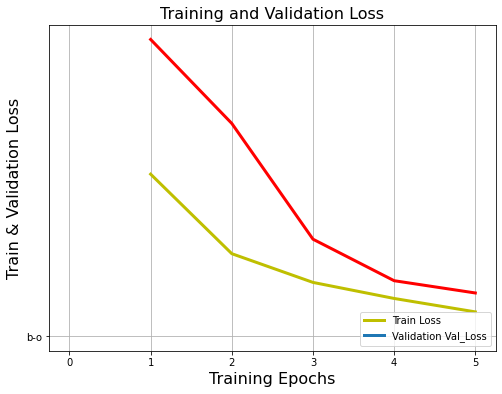

In [60]:
#plot the training and validation accuracy and loss at each epoch
plt.figure(figsize = (8,6))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.grid(True)
plt.plot(epochs, loss, 'y','b-o', label='Training loss',linewidth=3.0)
plt.plot(epochs, val_loss, 'r','b-o', label='Validation loss',linewidth=3.0)
plt.title('Training and Validation Loss',fontsize= 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Validation Loss",fontsize =16)
plt.legend(['Train Loss', 'Validation Val_Loss'], loc='lower right')
plt.show()

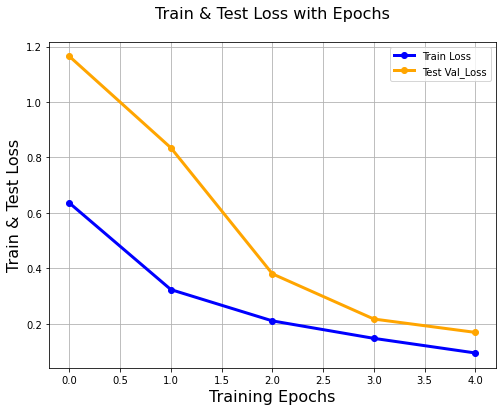

In [59]:
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(history.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

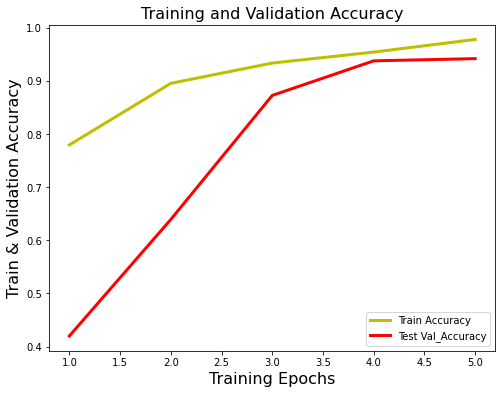

In [56]:
plt.figure(figsize = (8,6))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training acc',linewidth=3.0 )
plt.plot(epochs, val_acc, 'r', label='Validation acc',linewidth=3.0 )
plt.title('Training and Validation Accuracy',fontsize= 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Validation Accuracy",fontsize =16)
plt.legend(['Train Accuracy', 'Test Val_Accuracy'], loc='lower right')
plt.show()

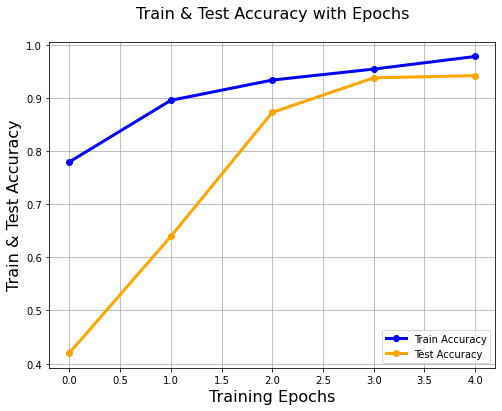

In [61]:
plt.figure(figsize = (8,6))
plt.plot(history.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [57]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

38/38 [==============================] - 7s 171ms/step


In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [66]:
#print(classification_report(test_labels, prediction_NN))

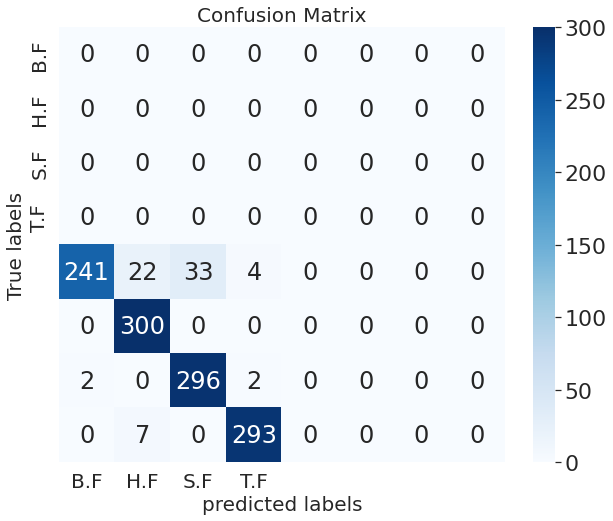

In [68]:
import seaborn as sns
cm = confusion_matrix(test_labels, prediction_NN)

plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt ='g',cmap = "Blues",ax=ax);

ax.set_xlabel('predicted labels',fontsize = 20);
ax.set_ylabel('True labels',fontsize = 20);
ax.set_title('Confusion Matrix',fontsize = 20);
#ax.xaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 20);
#ax.yaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 20);
ax.xaxis.set_ticklabels(['B.F','H.F','S.F','T.F'],fontsize = 20);
ax.yaxis.set_ticklabels(['B.F','H.F','S.F','T.F'],fontsize = 20);

[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [241  22  33   4   0   0   0   0]
 [  0 300   0   0   0   0   0   0]
 [  2   0 296   2   0   0   0   0]
 [  0   7   0 293   0   0   0   0]]


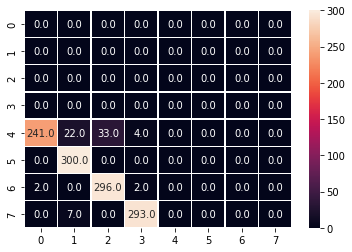

In [58]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True,
            fmt=".1f",                               
            linewidths=0.5, 
            linecolor='white')

1/1 [==============================] - 0s 36ms/step
The prediction for this image is:  ['/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Hilsha_Fish']
The actual label for this image is:  /content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Hilsha_Fish


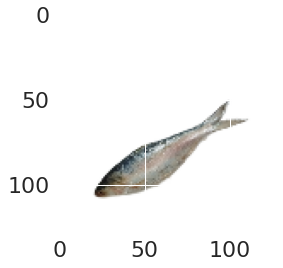

In [81]:
n=1199
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [69]:
f1_score(test_labels, prediction_NN,average = 'macro')

0.0

In [70]:
recall_score(test_labels, prediction_NN,average = 'weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [71]:
precision_score(test_labels, prediction_NN,average = 'macro')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [85]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Barbel_Fish/Barbel_Fish_004.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = cnn_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 35ms/step
[[0. 1. 0. 0.]]
[1, 0, 2, 3]
Hilsha_Fish : 100.0 %
Barbel_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
Tilapia_Fish : 0.0 %
